# Librerías

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm

# Variables

In [8]:
nt=500
nx=60
ny=60

nu = .3
dt = .001

dx=2/(nx-1)
dy=2/(ny-1)

x = np.linspace(-5, 5, nx)
y = np.linspace(-5, 5, ny)

t = np.linspace(0, 10, nt)

In [9]:
comb = np.ones((ny, nx))
u = np.ones((ny, nx))
v = np.ones((ny, nx))
un = np.ones((ny, nx))
vn = np.ones((ny, nx))
uf=np.ones((nt,nx,ny))
vf=np.ones((nt,nx,ny))

# Condiciones Iniciales

In [18]:
def ui(x,y):
  return 5*np.e**(-(x**2 + y**2))

def initU():
  u = np.zeros((nx,ny))
  for x in range(nx):
    for y in range(ny):
      u[x][y] = ui(x,y)
  return u

u=initU()
v=u

In [ ]:
for n in range(nt):
    un = u.copy()
    vn = v.copy()
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u[i,j] = (un[i, j] -(un[i, j] * dt / dx * (un[i, j] - un[i-1, j])) -vn[i, j] * dt / dy * (un[i, j] - un[i, j-1])) + (nu*dt/(dx**2))*(un[i+1,j]-2*un[i,j]+un[i-1,j])+(nu*dt/(dx**2))*(un[i,j-1]-2*un[i,j]+un[i,j+1])
            v[i,j] = (vn[i, j] -(un[i, j] * dt / dx * (vn[i, j] - vn[i-1, j]))-vn[i, j] * dt / dy * (vn[i, j] - vn[i, j-1])) + (nu*dt/(dx**2))*(vn[i+1,j]-2*vn[i,j]+vn[i-1,j])+(nu*dt/(dx**2))*(vn[i,j-1]-2*vn[i,j]+vn[i,j+1])
            uf[n,i,j]=u[i,j]
            vf[n, i, j] = v[i, j]

    u[:,0]=0
    u[:,-1]=0
    u[0,:]=0
    u[-1,:]=0
    v[0, :] = 0
    v[-1, :] = 0
    v[:, 0] = 0
    v[:, -1] = 0

# Gráfica

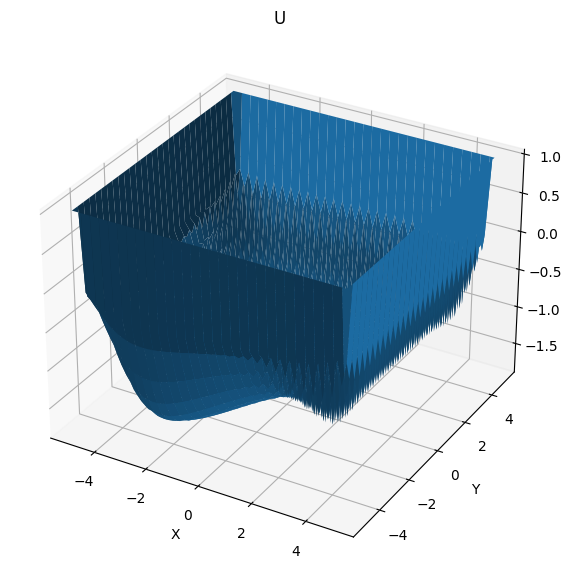

In [14]:
fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111, projection="3d")
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, uf[-1])
plt.title('U')
plt.xlabel('X')
plt.ylabel('Y');
fig.savefig('U.png')

In [15]:
fig1 = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111, projection="3d")
X, Y = np.meshgrid(x, y)

def init():

  ax1.clear()

def Update(i):
  init()
  ax1.plot_surface(X, Y, uf[i])

Animation = animation.FuncAnimation(fig1,Update,frames=len(uf),init_func=init)

<Figure size 500x500 with 0 Axes>